In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_importance
from lightgbm import LGBMClassifier
import xgboost as xgb
from lightgbm import plot_importance
from lightgbm import plot_importance

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest

from subprocess import call
from IPython.display import Image
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from yellowbrick.cluster import SilhouetteVisualizer

import graphviz
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.over_sampling import SMOTE

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
def get_shift(hour):
    if 6 <= hour < 14:
        return "1교대"
    elif 14 <= hour < 22:
        return "2교대"
    else:
        return "3교대"

In [3]:
df = pd.read_csv("/home/piai/다운로드/01_실습파일/2. Big Data 분석/SCALE불량.csv", encoding = 'euc-kr')
df.shape

(1000, 21)

In [4]:
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [5]:
df.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,934.637000,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,96.598015,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,0.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,893.750000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1078.000000,10.000000


In [6]:
df.describe(include = 'object')

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,1000,2,66,7,2,2,3,2,2,4
top,PLT_1001,03JAN2023:07:07:53,양품,JS-SM490YB,영국,C,적용,3호기,1열,CR(제어압연),2조
freq,1,1,690,84,256,755,953,342,508,840,292


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [8]:
df['timestamp'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')
df['day'] = df['rolling_date'].str[0:2]
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5
df['day_of_week'] = df['day_of_week'].astype(str)
df['is_weekend'] = df['is_weekend'].astype(str)

In [9]:
df_y = df['scale']
df_x = df.drop(columns=['scale'])

In [10]:
# 기존 데이터 처리 코드
df_x.drop(labels=['plate_no', 'spec_long', 'rolling_date', 'timestamp'], axis=1, inplace=True)

# 조건에 따라 df_x에서 데이터를 삭제
df_x = df_x[df_x['rolling_temp'] != 0]

# 조건에 따라 df_y에서 동일한 인덱스의 데이터 삭제
df_y = df_y[df_x.index]

# 피처 변환
df_x['shift'] = df_x['hour'].apply(get_shift)
df_x.drop(labels=['hour'], axis=1, inplace=True)

# 문자형 피처를 더미 변수로 변환
df_char = df_x.select_dtypes(include="object")
df_encoded = pd.get_dummies(df_char, drop_first=True)
df_x = pd.concat([df_x, df_encoded], axis=1)

# 불필요한 피처 제거
df_x.drop(labels=['spec_country', 'steel_kind', 'hsb', 'fur_no', 'fur_input_row', 'rolling_method', 'work_group', 'is_weekend',\
                  'day', 'day_of_week', 'shift'], axis=1, inplace=True)

# 타겟 변수 변환
df_y_original = df_y.replace({'양품': 0, '불량': 1})

# 연속형 피처와 범주형 피처를 분리
continuous_features = df_x.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_x.select_dtypes(include=['object']).columns

# 원본 데이터프레임 저장
df_x_original = df_x.copy()

# 연속형 피처를 표준화
scaler = StandardScaler()
df_x_scaled = df_x.copy()
df_x_scaled[continuous_features] = scaler.fit_transform(df_x_scaled[continuous_features])

In [11]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x_scaled, df_y_original, test_size=0.3, random_state=42)

# 피처 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일된 데이터프레임으로 변환
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# 상수항 추가
X_train_scaled_sm = sm.add_constant(X_train_scaled_df)
X_test_scaled_sm = sm.add_constant(X_test_scaled_df)

# 종속 변수와 독립 변수의 인덱스 확인 및 일치시키기
y_train = y_train.reset_index(drop=True)
X_train_scaled_sm = X_train_scaled_sm.reset_index(drop=True)

# 모델 생성 및 훈련
model = sm.Logit(y_train, X_train_scaled_sm)

# 모델 훈련
try:
    result = model.fit(maxiter=100)  # 반복 횟수 증가
except Exception as e:
    print(f"모델 훈련 중 오류 발생: {e}")

# NaN 값을 가진 피처 제거
nan_columns = result.summary2().tables[1][result.summary2().tables[1]['P>|z|'].isna()].index
X_train_scaled_sm = X_train_scaled_sm.drop(columns=nan_columns, errors='ignore')
X_test_scaled_sm = X_test_scaled_sm.drop(columns=nan_columns, errors='ignore')

# 개선 전 모델 요약 출력
print("모델 개선 전 요약:")
print(result.summary())

# VIF 계산 함수
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# VIF 계산 및 필터링
def filter_high_vif_features(data, threshold=10):
    vif_df = calculate_vif(data)
    print("VIF values before filtering:")
    print(vif_df.sort_values(by="VIF", ascending=True))
    
    high_vif_features = vif_df[vif_df["VIF"] > threshold]["feature"].tolist()
    return high_vif_features, vif_df

# VIF 10 이상인 피처 제거
high_vif_features, vif_df = filter_high_vif_features(X_train_scaled_sm, threshold=10)
X_train_filtered = X_train_scaled_sm.drop(columns=high_vif_features, errors='ignore')
X_test_filtered = X_test_scaled_sm.drop(columns=high_vif_features, errors='ignore')

# 개선 후 모델 재훈련
model = sm.Logit(y_train, X_train_filtered)
result_filtered = model.fit(maxiter=100)  # 반복 횟수 증가

# 개선 후 모델 요약 출력
print("모델 개선 후 요약:")
print(result_filtered.summary())

# 유의미한 피처 선택 및 제거 함수
def remove_non_significant_features(X_train_data, X_test_data, y_train_data, result, alpha=0.05):
    p_values = result.pvalues
    features = p_values.index
    while p_values.max() > alpha:
        # 가장 큰 p-value를 가진 피처 찾기
        worst_feature = p_values.idxmax()
        print(f"Removing feature: {worst_feature} with p-value: {p_values.max()}")
        
        # 피처 제거
        X_train_reduced = X_train_data.drop(columns=[worst_feature], errors='ignore')
        X_test_reduced = X_test_data.drop(columns=[worst_feature], errors='ignore')
        
        # 모델 재훈련
        model_reduced = sm.Logit(y_train_data, X_train_reduced)
        result_reduced = model_reduced.fit(maxiter=100)
        
        # p-values 업데이트
        p_values = result_reduced.pvalues
        X_train_data = X_train_reduced
        X_test_data = X_test_reduced
    
    return X_train_data, X_test_data, result_reduced

# 유의미한 피처만 남기기
X_train_final, X_test_final, result_final = remove_non_significant_features(X_train_filtered, X_test_filtered, y_train, result_filtered, alpha=0.05)

# 최종 모델 요약 출력
print("최종 모델 요약:")
print(result_final.summary())

# 최종 모델 VIF 계산
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

final_vif_df = calculate_vif(X_train_final)
print("Final VIF values:")
print(final_vif_df.sort_values(by="VIF", ascending=True))

# 예측
y_pred_prob = result_final.predict(X_test_final)
y_pred = (y_pred_prob >= 0.5).astype(int)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

         Current function value: 0.255705
         Iterations: 100
모델 개선 전 요약:
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                           34
Date:                Sun, 11 Aug 2024   Pseudo R-squ.:                  0.5874
Time:                        16:20:40   Log-Likelihood:                -177.72
converged:                      False   LL-Null:                       -430.71
Covariance Type:            nonrobust   LLR p-value:                 1.912e-85
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9093   2.66e+04  -3.42e-05      1.000    -5.2e+04     5.2e+04
pt_thic

Optimization terminated successfully.
         Current function value: 0.286125
         Iterations 9
Removing feature: day_10 with p-value: 0.316320681594388
Optimization terminated successfully.
         Current function value: 0.286853
         Iterations 9
Removing feature: fur_heat_time with p-value: 0.29420636274711587
Optimization terminated successfully.
         Current function value: 0.287642
         Iterations 9
Removing feature: pt_length with p-value: 0.23581555084343075
Optimization terminated successfully.
         Current function value: 0.288651
         Iterations 9
Removing feature: day_of_week_1 with p-value: 0.1986758767731286
Optimization terminated successfully.
         Current function value: 0.289897
         Iterations 9
Removing feature: spec_country_한국 with p-value: 0.16747234842960035
Optimization terminated successfully.
         Current function value: 0.291291
         Iterations 9
Removing feature: fur_no_2호기 with p-value: 0.16260249764607748
Optimiz

In [12]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],  # gamma가 사용되지 않는 경우 (예: linear 커널), 'auto'와 'scale'은 같은 역할을 함
#     'degree': [3, 4, 5]  # degree는 polynomial 커널에서만 사용됨
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# print(grid_search.best_params_)

In [13]:
# 직접 하이퍼파라미터 설정
svm_clf = SVC(C = 10, degree = 3, gamma = 'auto', kernel = 'rbf', random_state=42)

# 모델 훈련
svm_clf.fit(X_train, y_train)

# 예측
y_pred = svm_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

Accuracy: 0.89
Confusion Matrix:
[[193  12]
 [ 21  73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       205
           1       0.86      0.78      0.82        94

    accuracy                           0.89       299
   macro avg       0.88      0.86      0.87       299
weighted avg       0.89      0.89      0.89       299

Number of incorrect predictions: 33
Incorrect predictions:
Int64Index([925, 932, 875, 452, 140, 714, 308, 816, 326, 815, 796, 199, 407,
            485, 557, 292, 269, 289, 465, 428, 825, 453, 142, 770, 299, 727,
            805, 345, 353, 946, 743,   9, 443],
           dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
925 -0.369878 -0.069065   1.076801       1.068073      -0.871360   
932 -0.369878  0.540262   0.730816       0.926650      -0.530124   
875 -0.759112 -0.272174   1.213754       0.596662      -0.302634   
452 -0.536693  1.352698  -0.054858 

In [14]:
# 하이퍼파라미터 설정
param_grid = {
    'n_neighbors': [2],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1은 맨하탄 거리, 2는 유클리드 거리
}
    
    
# GridSearchCV를 사용한 하이퍼파라미터 조정
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print(grid_search.best_params_)

{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}


In [15]:
# 모델 생성 및 훈련
knn_clf = KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform')
knn_clf.fit(X_train, y_train)

# 예측
y_pred = knn_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)


Accuracy: 0.83
Confusion Matrix:
[[195  10]
 [ 42  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       205
           1       0.84      0.55      0.67        94

    accuracy                           0.83       299
   macro avg       0.83      0.75      0.77       299
weighted avg       0.83      0.83      0.81       299

Number of incorrect predictions: 52
Incorrect predictions:
Int64Index([932, 875, 452, 764, 362, 140, 714, 308, 816, 309, 326, 301, 823,
            815, 796, 199, 407, 485, 488, 826, 852, 820, 672, 557, 262, 292,
            673, 269, 289, 548, 295, 480, 825, 790, 453, 873, 142, 914, 666,
            299, 805, 345, 353, 723, 946, 743, 899, 829, 411,   9, 621, 856],
           dtype='int64')


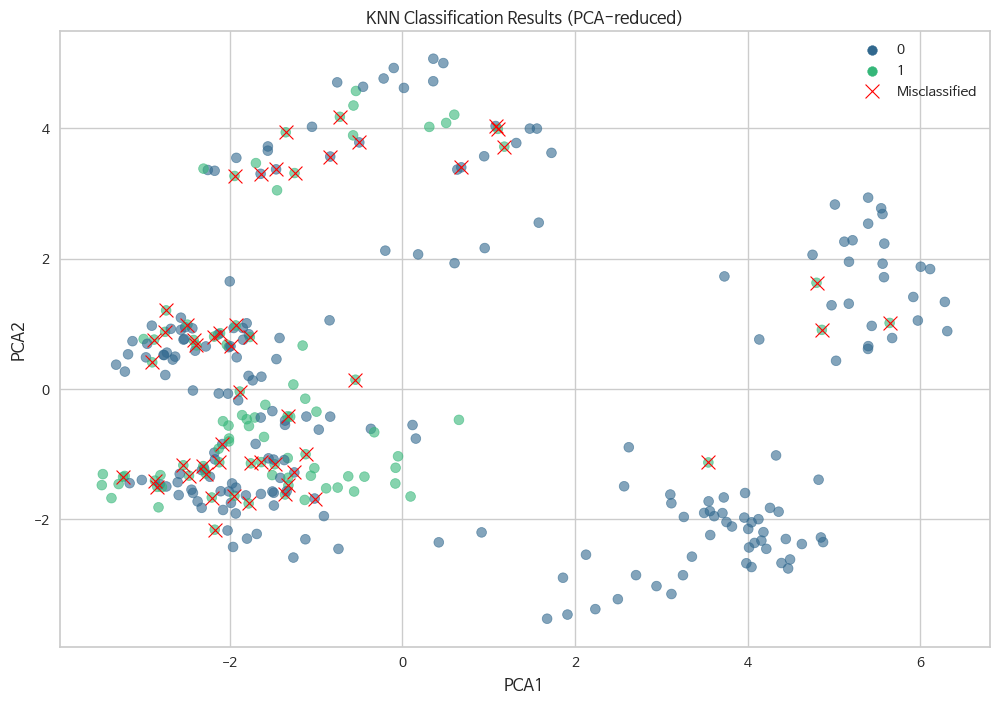

In [16]:
# 데이터 표준화
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# 차원 축소 (PCA)
pca = PCA(n_components=2)  # 2차원으로 축소
X_test_pca = pca.fit_transform(X_test_scaled)

# KNN 예측 결과를 DataFrame으로 변환
results_df = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])
results_df.index = X_test.index  # 원본 X_test의 인덱스를 사용
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred

# 잘못 예측된 샘플의 PCA 결과
incorrect_preds_pca = results_df.loc[incorrect_preds.index]

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results_df, x='PCA1', y='PCA2', hue='Actual', palette='viridis', marker='o', alpha=0.6, edgecolor=None)
sns.scatterplot(data=incorrect_preds_pca, x='PCA1', y='PCA2', color='red', marker='x', s=100, label='Misclassified')
plt.title('KNN Classification Results (PCA-reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# 밑으로 표준화 x

In [18]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_x_original, df_y_original, test_size=0.3, random_state=42)

In [19]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [5 * i for i in range(20)],
#     'min_samples_split': [10 * i for i in range(10)],
#     'min_samples_leaf': [5 * i for i in range(5)]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

Accuracy: 0.99
Confusion Matrix:
[[204   1]
 [  1  93]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       0.99      0.99      0.99        94

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 2
Incorrect predictions:
Int64Index([714, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
714        40      2500      23200           1158            129   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
714           1148             76             305           995   
9             1124             73             290           881   

     descaling_count  ...  day_of_week_2  day_of_week_3  day_of_week_4  \
714                

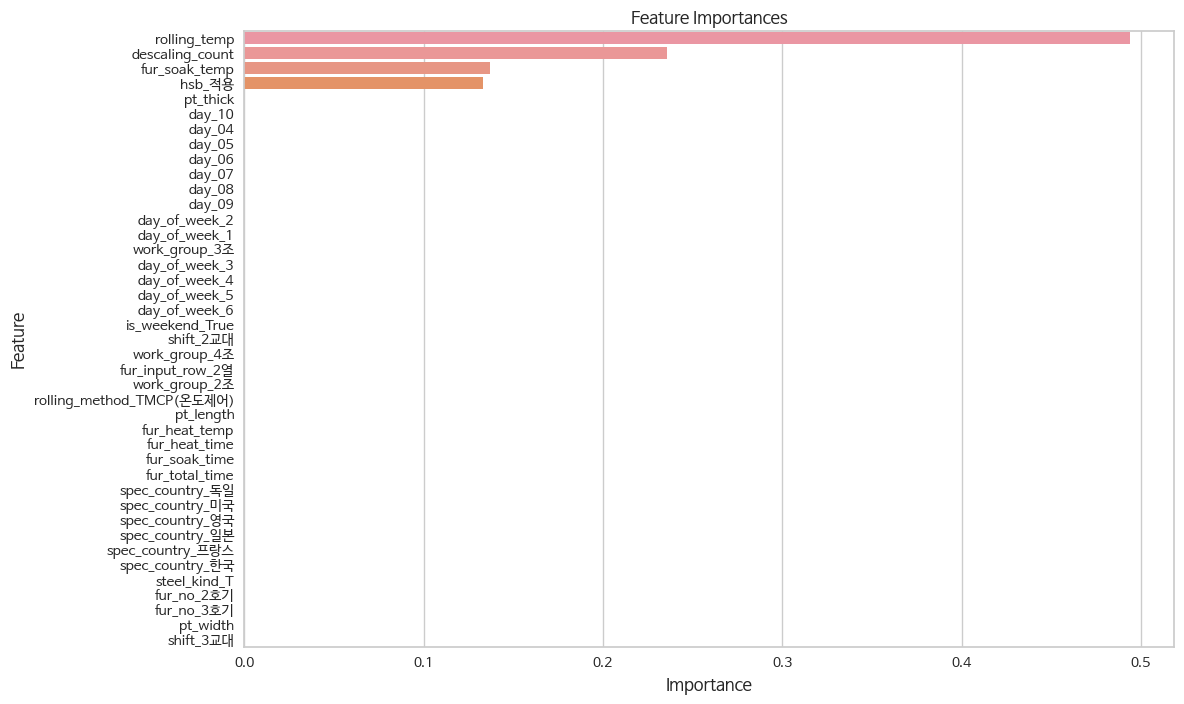

In [20]:
# 최적의 하이퍼파라미터로 모델 생성
best_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 5, min_samples_split = 10)

# 모델 훈련
best_clf.fit(X_train, y_train)

# 예측
y_pred = best_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = best_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [21]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [5 * i for i in range(20)],
#     'min_samples_split': [10 * i for i in range(10)],
#     'min_samples_leaf': [5 * i for i in range(5)],
#     'bootstrap': [True, False]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")


Accuracy: 0.96
Confusion Matrix:
[[204   1]
 [ 11  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       205
           1       0.99      0.88      0.93        94

    accuracy                           0.96       299
   macro avg       0.97      0.94      0.95       299
weighted avg       0.96      0.96      0.96       299

Number of incorrect predictions: 12
Incorrect predictions:
Int64Index([875, 308, 326, 485, 557, 292, 299, 727, 353, 946, 9, 621], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
875        13      2700      53700           1170             78   
308        21      2800      44900           1146             64   
326        18      3100      41800           1115             58   
485        18      3100      46300           1194             73   
557        40      2300      25500           1161            105   
292        16      2600      37300       

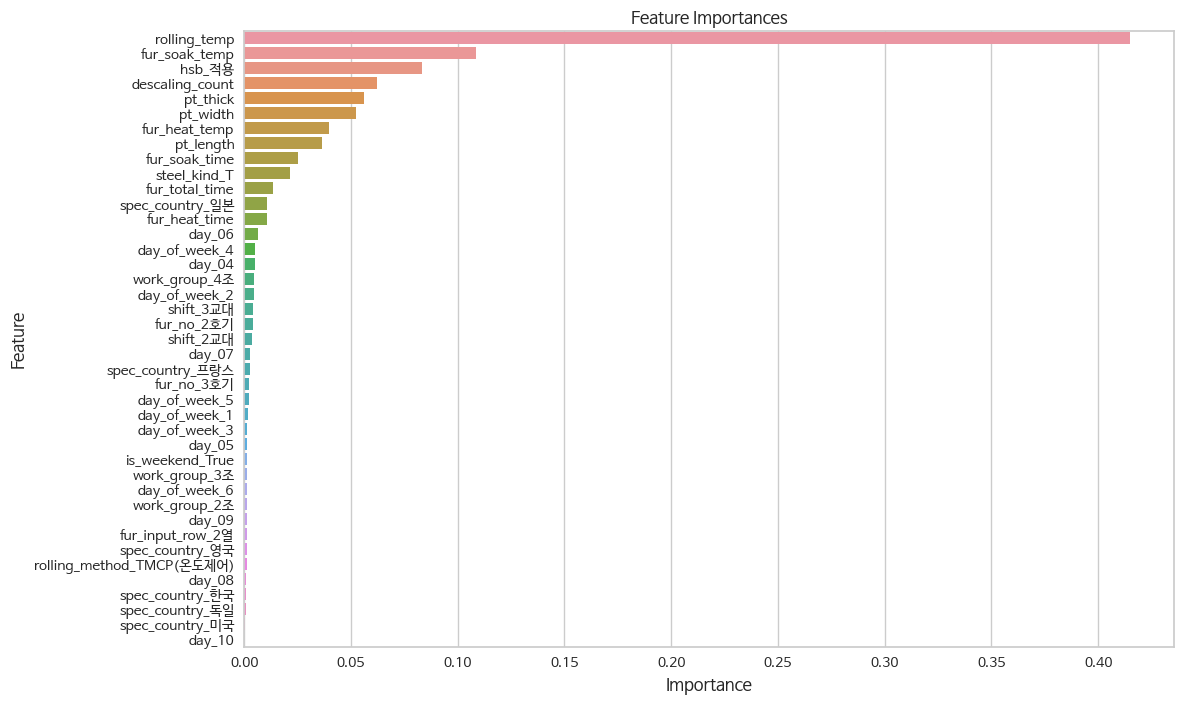

In [22]:
# 모델 생성 및 훈련
rf_clf = RandomForestClassifier(bootstrap = False, max_depth = 15, min_samples_leaf = 5, min_samples_split = 20, \
                                n_estimators = 50, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측
y_pred = rf_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = rf_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
#     'max_depth': [5 * i for i in range(20)],
#     'min_samples_split': [10 * i for i in range(10)],
#     'min_samples_leaf': [5 * i for i in range(5)]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

Accuracy: 0.99
Confusion Matrix:
[[205   0]
 [  4  90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       205
           1       1.00      0.96      0.98        94

    accuracy                           0.99       299
   macro avg       0.99      0.98      0.98       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 4
Incorrect predictions:
Int64Index([308, 557, 263, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
308        21      2800      44900           1146             64   
557        40      2300      25500           1161            105   
263        20      2200      42400           1155             95   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
308           1151             62             223           971   
557           1

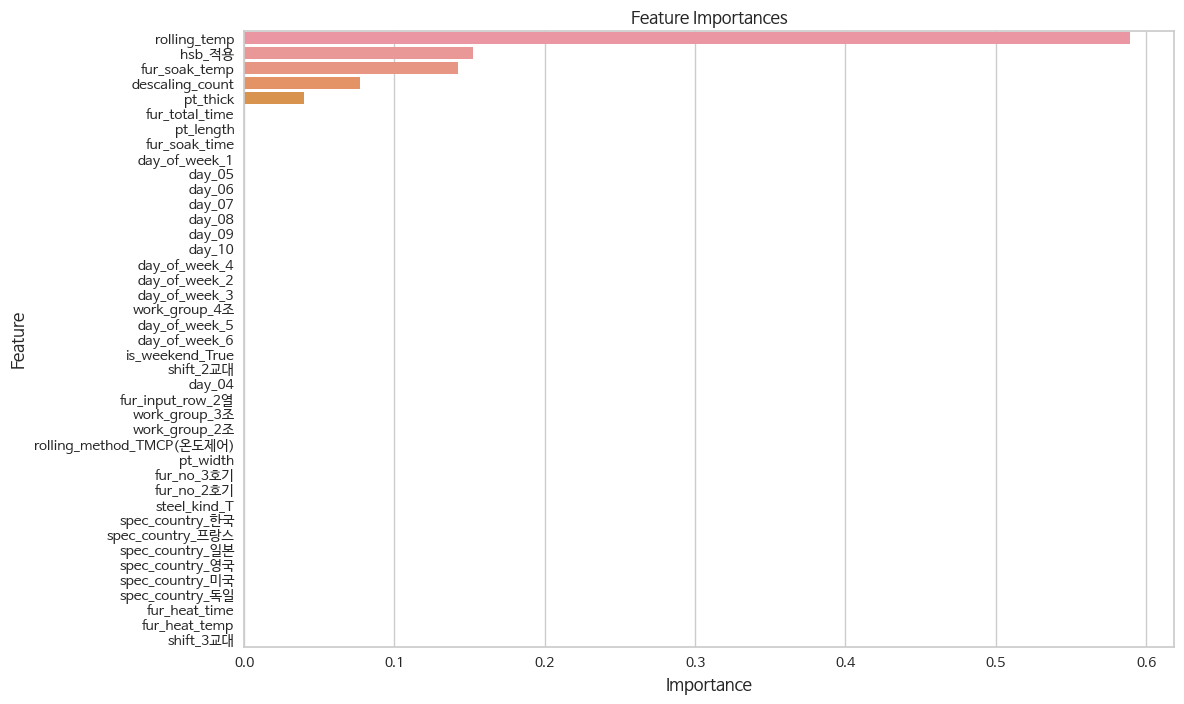

In [24]:
# 모델 생성 및 훈련
gb_clf = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, min_samples_leaf = 10, min_samples_split = 10,\
                                    n_estimators = 5, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측
y_pred = gb_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = gb_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [25]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
#     'max_depth': [5 * i for i in range(20)],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

Accuracy: 0.99
Confusion Matrix:
[[204   1]
 [  2  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       205
           1       0.99      0.98      0.98        94

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 3
Incorrect predictions:
Int64Index([714, 557, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
714        40      2500      23200           1158            129   
557        40      2300      25500           1161            105   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
714           1148             76             305           995   
557           1125            122             293           820   
9             1124   

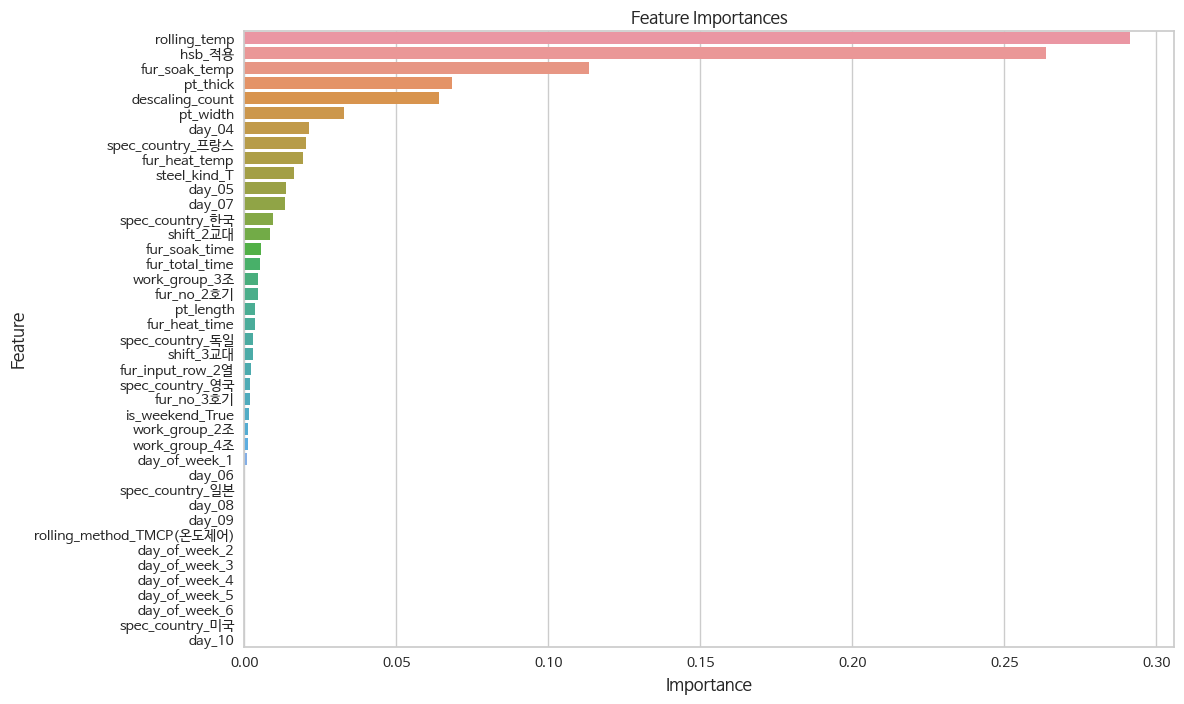

In [26]:
# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 5, min_child_weight = 1, \
                              n_estimators = 200, subsample = 1.0, random_state=42)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [27]:
# # 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.2],
#     'max_depth': [5 * i for i in range(20)],
#     'num_leaves': [31, 63, 127],
#     'min_child_samples': [20, 30, 40],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # GridSearchCV를 사용한 하이퍼파라미터 조정
# grid_search = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터
# best_params = grid_search.best_params_
# print(f"Best parameters found: {best_params}")

Accuracy: 0.99
Confusion Matrix:
[[204   1]
 [  1  93]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       0.99      0.99      0.99        94

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299

Number of incorrect predictions: 2
Incorrect predictions:
Int64Index([714, 9], dtype='int64')
     pt_thick  pt_width  pt_length  fur_heat_temp  fur_heat_time  \
714        40      2500      23200           1158            129   
9          38      3100      16200           1135            119   

     fur_soak_temp  fur_soak_time  fur_total_time  rolling_temp  \
714           1148             76             305           995   
9             1124             73             290           881   

     descaling_count  ...  day_of_week_2  day_of_week_3  day_of_week_4  \
714                

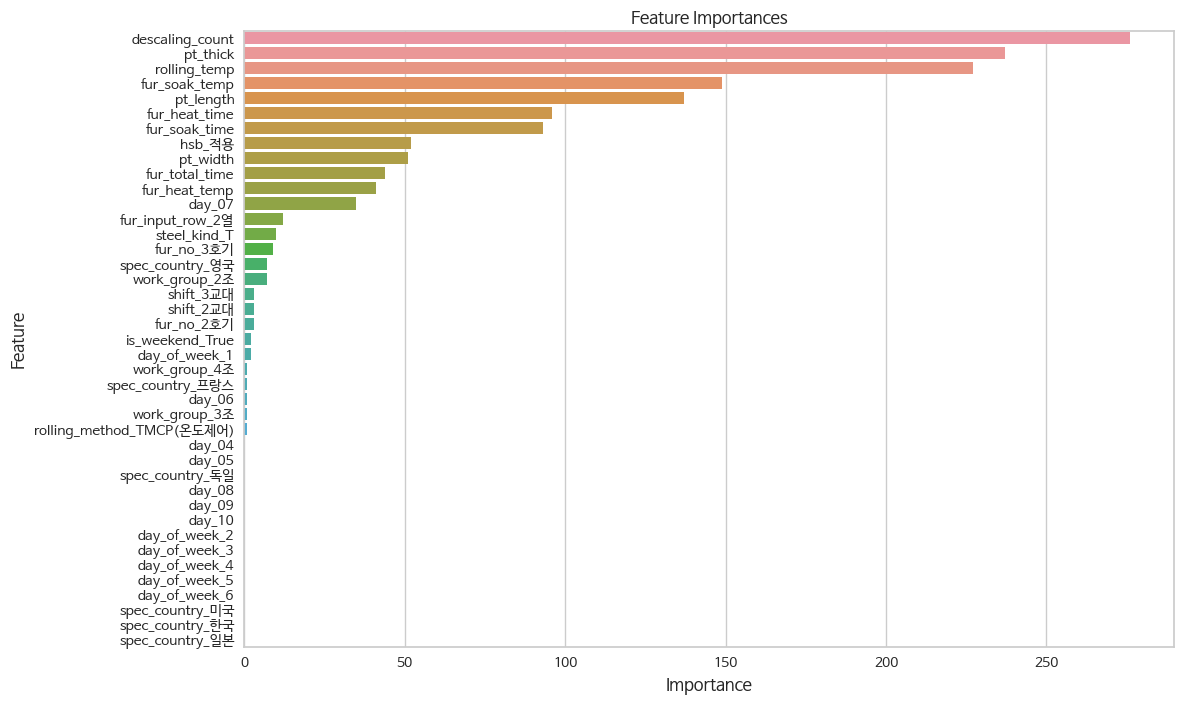

In [28]:
# LightGBM 모델 생성 및 훈련
lgb_clf = LGBMClassifier(colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 10, min_child_samples = 20, \
                         n_estimators = 200, num_leaves = 31, subsample = 0.8, random_state=42)
lgb_clf.fit(X_train, y_train)

# 예측
y_pred = lgb_clf.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
# 예측 결과와 실제 값 비교
incorrect_preds = X_test.copy()
incorrect_preds['Actual'] = y_test
incorrect_preds['Predicted'] = y_pred

# 틀린 예측만 필터링
incorrect_preds = incorrect_preds[incorrect_preds['Actual'] != incorrect_preds['Predicted']]

# 결과 출력
print(f"Number of incorrect predictions: {len(incorrect_preds)}")
print("Incorrect predictions:")
print(incorrect_preds.index)
print(incorrect_preds)

# 피처 중요도 추출
feature_importances = lgb_clf.feature_importances_
feature_names = X_train.columns  # X_train이 DataFrame인 경우
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()